## Estandarizar el proceso de importacion de datos (al usar colab)

# Presentación del Dataset Iris

En el presente ejemplo comenzamos con un dataset **público** utilizado para la formación de **Machine Learning** denominado Iris dataset en base a las características del sépalo y pétalo de las flores.

In [1]:
#Comenzamos importando la librería seaborn para manipular los datos que extraigamos y convertirlos en gráficos para visualizarlos fácilmente
import pandas as pd
import seaborn as sns

#Todas las librerías se deberían importar al principio #Pablo

In [2]:
#Creamos la variable iris y le asignamos el dataset iris usando un método de sns (seaborn) denominado load_dataset que nos sirve para subir datos
iris = sns.load_dataset('iris')
#iris = pd.read_csv()
#Importar desde csv.. con pandas con el read_csv()

In [17]:
#Mostramos los primeros cinco (5) registros del dataset iris con la instrucción head. Este número se muestra por defecto
iris.head() 
#Usar el help y type y explicarlo....

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.info()
#float, object, integer, hay más...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Como resultado hemos obtenido 5 filas con las observaciones de las características de una flor.
    Hay una columna a la izquierda **en negrita** que hace referencia a la posición de cada fila que es el index. La primera fila ocupa el número **cero**
Hay una columna a la derecha denominada *species* que asigna el tipo de flor de cada observación. Esta columna es importante porque será la **variable objetivo** que vamos a predecir usando el método de **clustering** (aprendizaje *no supervisado*)

C:\Users\pablo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


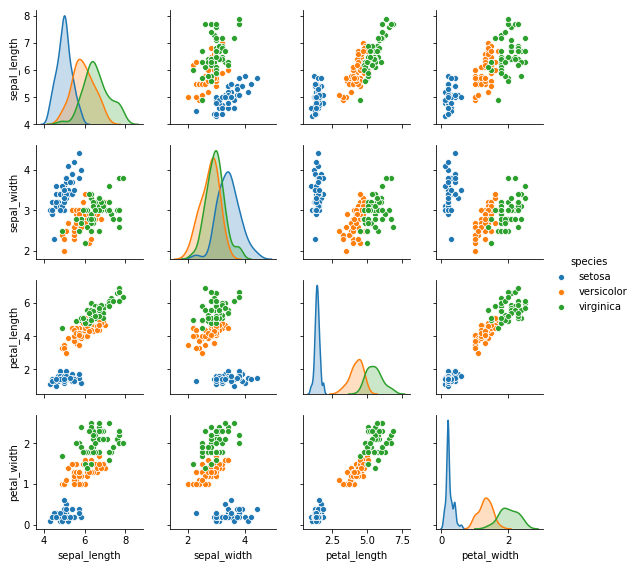

In [29]:
#Usando el método pairplot podemos graficar las cuatro variables del dataset iris cruzándolas entre ellas
#El parámetro hue le da nombre a la leyenda del gráfico y el size permite limitar el tamaño del gráfico (mientras más pequeño es más facil ver)
sns.pairplot(iris,hue='species', size=2.0)

Las gráficas permiten identificar **correlaciones directas** entre variables como por ejemplo las variables **petal_length y petal width** se pueden graficar siguiendo una regresión lineal.

### En este caso sería mejor decir que tienen una relación directa: A más petal width, también más petal_length

/#Pablo

# Tratamiento de la Data

Identificamos como **variable objetivo** (target) como 'species'. Las demás variables serán las **predictoras** (features) para el modelo. También podemos obtener estadísticos básicos de estas variables.

In [32]:
#Creamos una variable X_iris para guardar el resultado de eliminar la columna species del dataset iris
X_iris = iris.drop('species', axis=1) 

#axis = 1 es para las columnas, axis = 0 es para las filas.

In [17]:
#Creamos una variable y_iris para guardar la columna species del dataset iris
y_iris = iris['species']

In [18]:
#Para visualizar el tamaño del dataset utilizamos el método shape, como resultado obtenemos el números de filas y columnas (en este orden)
X_iris.shape

(150, 4)

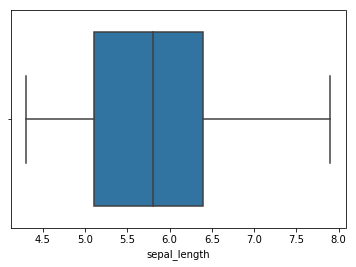

In [37]:
#Para visualizar la lista de estadísticos básicos utilizamos el método describe
sns.boxplot(x = 'sepal_length', data=iris)

Estos descriptivos verifican que las cuatro variables almacenan **150 observaciones**, todas ellas con datos numéricos. Para este ejemplo no contamos con datos *categóricos* (no numéricos) y tampoco aparecen vacíos o errores. Sobre el tratamiento de este tipo de datos profundizaremos en las siguientes sesiones de clase

## Creo que no debería ir PCA porque la cantidad de variables predictoras no es mucha. Al hacer PCA se pierde algo de información de la data

Para aplicar el modelo de *clustering* vamos a realizar una **reducción de dimensionalidad** donde las variables predictoras se reducen a solo dos (2) PCA -que son las iniciales de *Principal Component Analysis*- de esta manera vamos a visualizar el dataset iris en función de solo dos *nuevas variables predictoras* denominadas PCA1 y PCA2

In [54]:
#Importamos la librería PCA
from sklearn.decomposition import PCA

#Creamos  una variable feature_pca para asignar PCA, definimos el valor de n_components para limitar a dos las variables finales
features_pca = PCA(n_components=2)

#Habría que saber cuáles son y qué hacen los parámetros dentro de las funciones.

In [55]:
#Adaptamos la variable creada feature_pca con la data guardada en X_iris
features_pca.fit(X_iris)

#Creamos una variable X_2D para guardar este último cambio
X_2D = features_pca.transform(X_iris)

Para visualizar el resultado de la reducción usamos el método **lmplot** del seaborn (sns). Previamente añadimos al dataset iris las dos dimensiones ya obtenidas: PCA 1 y PCA 2

In [56]:
#Añadimmos una columna denominada PCA1 al dataset iris usando la columna 0 de la variable X_2D, es decir la primera columna contando de izquierda a derecha
iris['PCA1'] = X_2D[:, 0]

#Añadimmos una columna denominada PCA2 al dataset iris usando la columna 1 de la variable X_2D, es decir la segunda columna contando de izquierda a derecha
iris['PCA2'] = X_2D[:, 1]

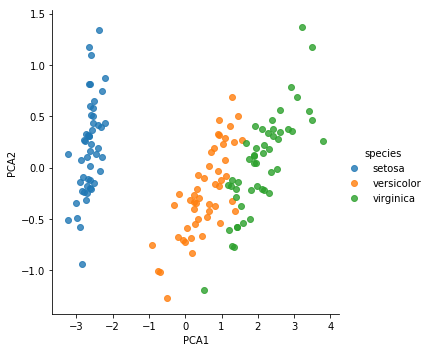

In [57]:
#Finalmente usamos el método lmplot para graficar ambas dimensiones, ahora nuestro dataset iris tiene dos nuevas columnas PCA1 y PCA2
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

# Selección y preparación del modelo

Ahora vamos a seleccionar un **modelo de clustering o agrupamiento** denominado *Kmeans*. Este modelo lo vamos a adaptar con las nuevas dos dimensiones que obtuvimos a partir de X_iris (PCA1, PCA2). Ambas variables están guardadas en X_2D

In [38]:
#Importamos la librería KMeans
from sklearn.cluster import KMeans

#Creamos una variable kmeans para guardar el modelo Kmeans
#Definimos los parámetros n_clusters para limitar solo tres agrupamientos, también podemos definir el máximo de iteraciones con max_iter
kmeans = KMeans(n_clusters=3, max_iter=600)
#Habría que saber los parámetros, los por qués

In [42]:
#Perfilamos el modelo kmeans con los datos guardados en X_2D
kmeans = kmeans.fit(X_iris)

In [43]:
#Creamos una variable predicciones para obtener las predicciones usando el modelo kmeans a partir de los datos guardados en X_2D
predicciones = kmeans.predict(X_iris)

In [46]:
predicciones

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Finalmente procedemos a visualizar los cluster obtenidos usando una función denominada plot_kmeans. El desarrollo de esta función se encuentra en: https://towardsdatascience.com/gaussian-mixture-modelling-gmm-833c88587c7f

In [50]:
#Importamos la librería pyplot para graficar
import matplotlib.pyplot as plt

In [51]:
#Importamos la librería cdist para definir la función XXXXXXXXXXXXXX
#Se importa la librería para medir las distancias dentro del espacio.
from scipy.spatial.distance import cdist

#Definimos una figura usando pyplot que será utilizado dentro de la función XXXXXXXXXXXXXXXX
#El siguiente script es para definir el tamaño del plot posterior.
plt.figure(figsize = (10,8))

#Definimos la función plot_kmeans
def plot_kmeans(kmeans, X, n_clusters=3, rseed=0, ax=None):
    labels = kmeans.fit_predict(X) #.

    #Se tendría que explicar este código, por eso recomiendo hacer un plot más básico (buscar uno)
    ax = ax or plt.gca() #???????????
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2) 

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_ #Tiene el metodo cluster_centers_ para plotear alrededor de los centros
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)] #El radio para plotear el ciruclo
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

<Figure size 720x576 with 0 Axes>

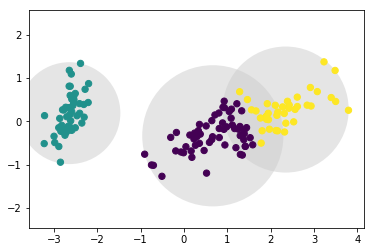

In [58]:
#Graficamos los cluster usando el modelo kmeans que hemos construido y los datos guardados en X_2D
plot_kmeans(kmeans, X_2D)

In [60]:
predicciones

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])